# Задча XI 9.3(б)
$$
\begin{cases}
 y'' - x \sqrt y = 0,  &  0 ≤ x ≤ 1\\ 
 y(0) = 0 \\
 \int^1_0 y(x) dx = 1
\end{cases}
$$
Пусть y'(0) = 1,9(сначала взял 0,5, очень долго выполнялся код, поменял на 1,9 для быстроты выполнения) и y' = a, тогда a(0) = 1,9. Система примет следующий вид:
$$
\begin{cases}
 y' = a \\
 a' = x \sqrt y,& 0 ≤ x ≤ 1\\
 y(0) = 0, a(0) = 1
\end{cases}
$$

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def f(x, vec):
    y = vec[0]
    a = vec[1]
    return np.array([a, x * np.sqrt(y)])

def RK_4(x, start_vector, h, number_move):                      # Метод Рунге-Кутта 4-го порядка
    y = np.zeros((number_move, np.shape(start_vector)[0]))
    y[0] = start_vector
    sum_integral = 0   
    
    for i in range(0, number_move - 1):
        k_1 = f(x[i], y[i])
        k_2 = f(x[i] + h / 2, y[i] + k_1 * h / 2)
        k_3 = f(x[i] + h / 2, y[i] + k_2 * h / 2)
        k_4 = f(x[i] + h, y[i] + k_3 * h)

        y[i + 1] = y[i] + h  * (k_1 + 2 * k_2 + 2 * k_3 + k_4) / 6
    
        if (i != 0):
            sum_integral += (y[i][0] + y[i - 1][0]) / 2 * h
        
    return sum_integral, y   

def draw_RK(result, x):
    plt.figure(figsize = (6, 6))
    y, a = result.T

    plt.plot(x, y, color='blue',  linewidth=2)
    plt.ticklabel_format(style='plain')

    plt.minorticks_on()
    plt.grid(which='major', color='black', linestyle='-')
    plt.grid(which='minor', color='0.65', linestyle='--', linewidth=0.1)

    plt.xlabel(r'$x$', fontsize=20)
    plt.ylabel(r'$y$', fontsize=20)
    
    
    plt.show()

Значение интеграла: 0.9999886279752808
Значение альфа: 1.9339999999999962


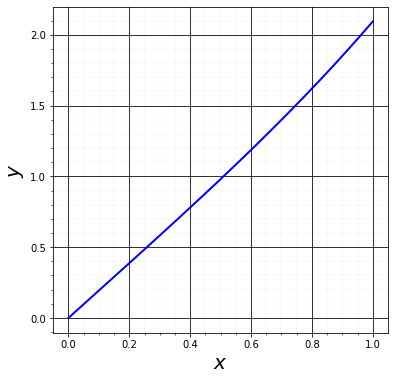

In [2]:
x_0_integ = 0
x_1_integ = 1
h = 1e-3
    
number_move = int((x_1_integ - x_0_integ) / h) + 1
x = np.linspace(x_0_integ, x_1_integ, number_move)
 
integral = 0
y = np.empty((0), float)
epsilon = 1e-4
x_0 = 0
y_0 = 0
a_0 = 1.9

while(True):
    start_vector = np.array([y_0, a_0])
    integral, y = RK_4(x, start_vector, h, number_move)
    a_0 += 10 * epsilon
    if(abs(integral - 1.0) < epsilon):
        print('Значение интеграла:', integral)
        break
    
print('Значение альфа:', a_0)
draw_RK(y, x)

Рисунок: решение системы при условии F(x,y',y") = 0. Кажется, что график имеет линейную зависимость, однако это не так.


# Вывод
В работе был реализован метод стрельбы для решения дифференциального уравнения. Решение имеет достаточно точный вид.